# Hands On 2
A partir del Modelo Matemático de Análisis Predictivo, Simple Linear Regression (SLR):

1. Implementar el modelo, orientado a objetos, a través del lenguaje de programación que les resulte más conveniente. Esto es, se deben implementar las dos fórmulas construidas en clase.

2. Dado el DataSet del Caso Benetton calcular los valores óptimos para los parámetros del Modelo Predictivo (Beta_0 y Beta_1).

3. Sólo utilizarán las columnas Sales y Advertising.

Caso Benetton:
https://www.displayr.com/what-is-linear-regression/


## DataSet Caso Benetton 

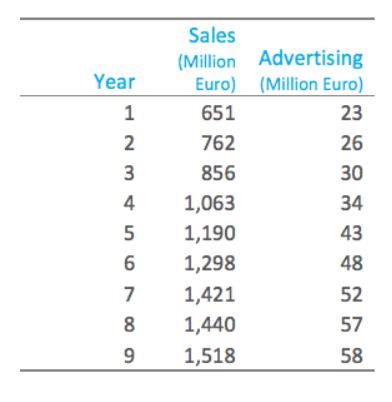

----
## Implementacion de los datos

Primero que nadad tenemos que cargar los datos al programa para despues, entonces utilizarlos, para esto necesitamos: 

1. Importar la libreria pandas 
2. Crear un diccionario, para despues con el modulo *DataFrame* generar un DatSet

In [2]:
import pandas as pd

# Crear el DataFrame con los datos del Caso Benetton
data = {
    'Sales': [651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518],
    'Advertising': [23, 26, 30, 34, 43, 48, 52, 57, 58]
}

df = pd.DataFrame(data)
print(df)

   Sales  Advertising
0    651           23
1    762           26
2    856           30
3   1063           34
4   1190           43
5   1298           48
6   1421           52
7   1440           57
8   1518           58


Ahora lo que necesitamos es implementar las dos formulas para encontrar la mejor funcion que pueda predecir nuestro dataset, esto lo hacemos con las siguientes formulas 

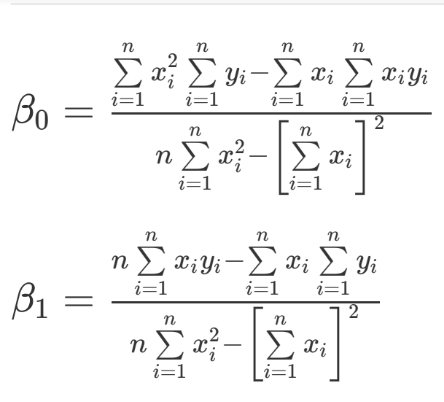

Recordando que
- B0: Termino independiente que nos muestra a que altura la recta por el eje de las y

- B1: Pendiente de la recta

-----
## Implementacion de las funciones 

In [7]:
def SLR(data):
    # Definimos nuestras variables
    sum_x = data['Advertising'].sum()
    sum_y = data['Sales'].sum()
    x2 = (data['Advertising'] ** 2).sum()
    xy = (data['Sales'] * data['Advertising']).sum()
    n = data.shape[0]
    
    # Funciones
    b0 = ((sum_y*x2) - (sum_x*xy)) / ((n*x2) - (sum_x*sum_x))

    b1 = ((n*xy) - (sum_x*sum_y)) / ((n*x2) - (sum_x*sum_x))

    return b0, b1

# Almacenamos las variables 
global b0, b1
b0, b1 = SLR(df)

Ahora que ya tenemos las variables vamos a mostrarlas 

In [36]:
from fractions import Fraction
global b0, b1, b0_round, b1_fraction
print(f'b0: {b0}, b1: {b1}')

b1_fraction = Fraction(b1).limit_denominator(10)
b0_round = round(b0)

print(f'Funcion: {b0_round} + ({b1_fraction})x + e')

b0: 167.68294945122895, b1: 23.42278559282733
Funcion: 168 + (164/7)x + e


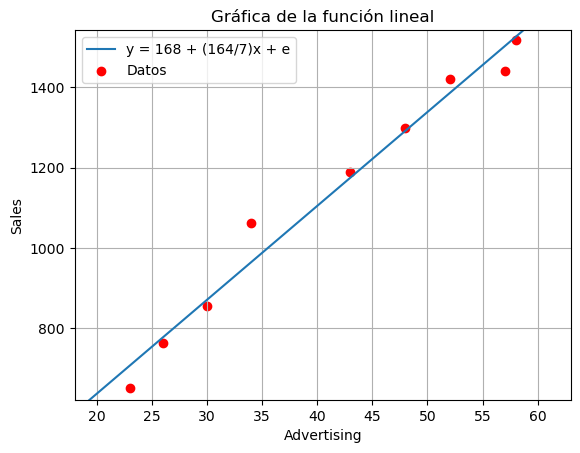

In [40]:
import matplotlib.pyplot as plt
import numpy as np

global b0, b1, b0_round, b1_fraction

y_points = np.array(data['Sales'])
x_points = np.array(data['Advertising'])


# Calcular los valores correspondientes de y
y = b0 + b1 * x

# Crear la gráfica
plt.plot(x, y, label=f'y = {b0_round} + ({b1_fraction})x + e')

plt.scatter(x_points, y_points, color='red', label='Datos')

# Añadir líneas en el eje x y el eje y
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Añadir etiquetas y título
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Gráfica de la función lineal')
plt.legend(loc='upper left')

# Ajustar los límites de los ejes para acercar la gráfica
plt.xlim(min(x_points) - 5, max(x_points) + 5)
plt.ylim(min(y_points) - 30, max(y_points) + 25)

# Mostrar la gráfica
plt.grid(True)
plt.show()